Esta librera extrae las imagenes the [Grocery Dataset](https://github.com/gulvarol/grocerydataset) para el entramiento de la deteccion de objetos para el proyecto de conteo en tiendas.


## Extraer los archivos de las imagenes del foro indicado

In [1]:
!wget -q https://github.com/gulvarol/grocerydataset/releases/download/1.0/GroceryDataset_part1.tar.gz
!tar xf GroceryDataset_part1.tar.gz

In [2]:
!apt-get install tree
!tree -L 2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 2 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 2s (23.8 kB/s)
Selecting previously unselected package tree.
(Reading database ... 117540 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
.
├── BrandImages
│   ├── 1
│   ├── 10
│   ├── 2
│   ├── 3
│   ├── 4
│   ├── 5
│   ├── 6
│   ├── 7
│   ├── 8
│   └── 9
├── GroceryDataset_part1.tar.gz
├── ProductImages
│   ├── 1
│   ├── 10
│   ├── 2
│   ├── 3
│   ├── 4
│   ├── 5
│   ├── 6
│   ├── 7
│   ├── 8
│   └── 9
├── sample_data
│ 

In [3]:
import os
import shutil
import random

original_dir = "ShelfImages"
train_dir = "dataset/train"
test_dir = "dataset/test"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

images = [f for f in os.listdir(original_dir)
          if f.lower().endswith((".jpg", ".png", ".jpeg"))]

random.shuffle(images)

split = int(0.8 * len(images))
train_imgs = images[:split]
test_imgs = images[split:]

for img in train_imgs:
    shutil.copy(os.path.join(original_dir, img),
                os.path.join(train_dir, img))

for img in test_imgs:
    shutil.copy(os.path.join(original_dir, img),
                os.path.join(test_dir, img))

print("Train/Test creados correctamente ✅")


Train/Test creados correctamente ✅


In [4]:
!wget -q https://github.com/gulvarol/grocerydataset/releases/download/1.0/GroceryDataset_part2.tar.gz
!tar xf GroceryDataset_part2.tar.gz

In [5]:
!ls -lh ShelfImages | head -10
!ls -lh dataset//train | head -10
!ls -lh dataset//test | head -10

total 558M
-rw-r--r-- 1 652860 21076  645K Mar 13  2014 C1_P01_N1_S2_1.JPG
-rw-r--r-- 1 652860 21076  2.1M Mar  6  2014 C1_P01_N1_S2_2.JPG
-rw-r--r-- 1 652860 21076  1.1M Mar 13  2014 C1_P01_N1_S3_1.JPG
-rw-r--r-- 1 652860 21076  870K Mar 13  2014 C1_P01_N1_S3_2.JPG
-rw-r--r-- 1 652860 21076  907K Mar 13  2014 C1_P01_N1_S5_1.JPG
-rw-r--r-- 1 652860 21076  2.1M Mar  6  2014 C1_P01_N2_S2_1.JPG
-rw-r--r-- 1 652860 21076  1.3M Mar 13  2014 C1_P01_N2_S3_1.JPG
-rw-r--r-- 1 652860 21076  1.1M Mar 13  2014 C1_P01_N2_S4_1.JPG
-rw-r--r-- 1 652860 21076  2.0M Mar  6  2014 C1_P01_N3_S2_1.JPG
total 446M
-rw-r--r-- 1 root root  645K Jan 31 03:00 C1_P01_N1_S2_1.JPG
-rw-r--r-- 1 root root  870K Jan 31 03:00 C1_P01_N1_S3_2.JPG
-rw-r--r-- 1 root root  907K Jan 31 03:00 C1_P01_N1_S5_1.JPG
-rw-r--r-- 1 root root  2.1M Jan 31 03:00 C1_P01_N2_S2_1.JPG
-rw-r--r-- 1 root root  1.3M Jan 31 03:00 C1_P01_N2_S3_1.JPG
-rw-r--r-- 1 root root  2.0M Jan 31 03:00 C1_P01_N3_S2_1.JPG
-rw-r--r-- 1 root root  2.1M Jan 31 

Desde aquí podemos tener una idea de cómo se nombra cada imagen individual:
Por ejemplo: C1_P02_N1_S4_1.JPG
```
"C<c>_P<p>_N<n>_S<s>_<i>.JPG"
    where
        <c> := camera id (1: iPhone5S, 2: iPhone4, 3: Sony Cybershot, 4: Nikon Coolpix)
        <p> := planogram id
        <n> := the rank of the top shelf on the image according to the planogram
        <s> := number of shelves on the image
        <i> := copy number
```

## Imports

In [6]:
from imutils import paths
from typing import List
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Visualizar las imágenes sin procesar

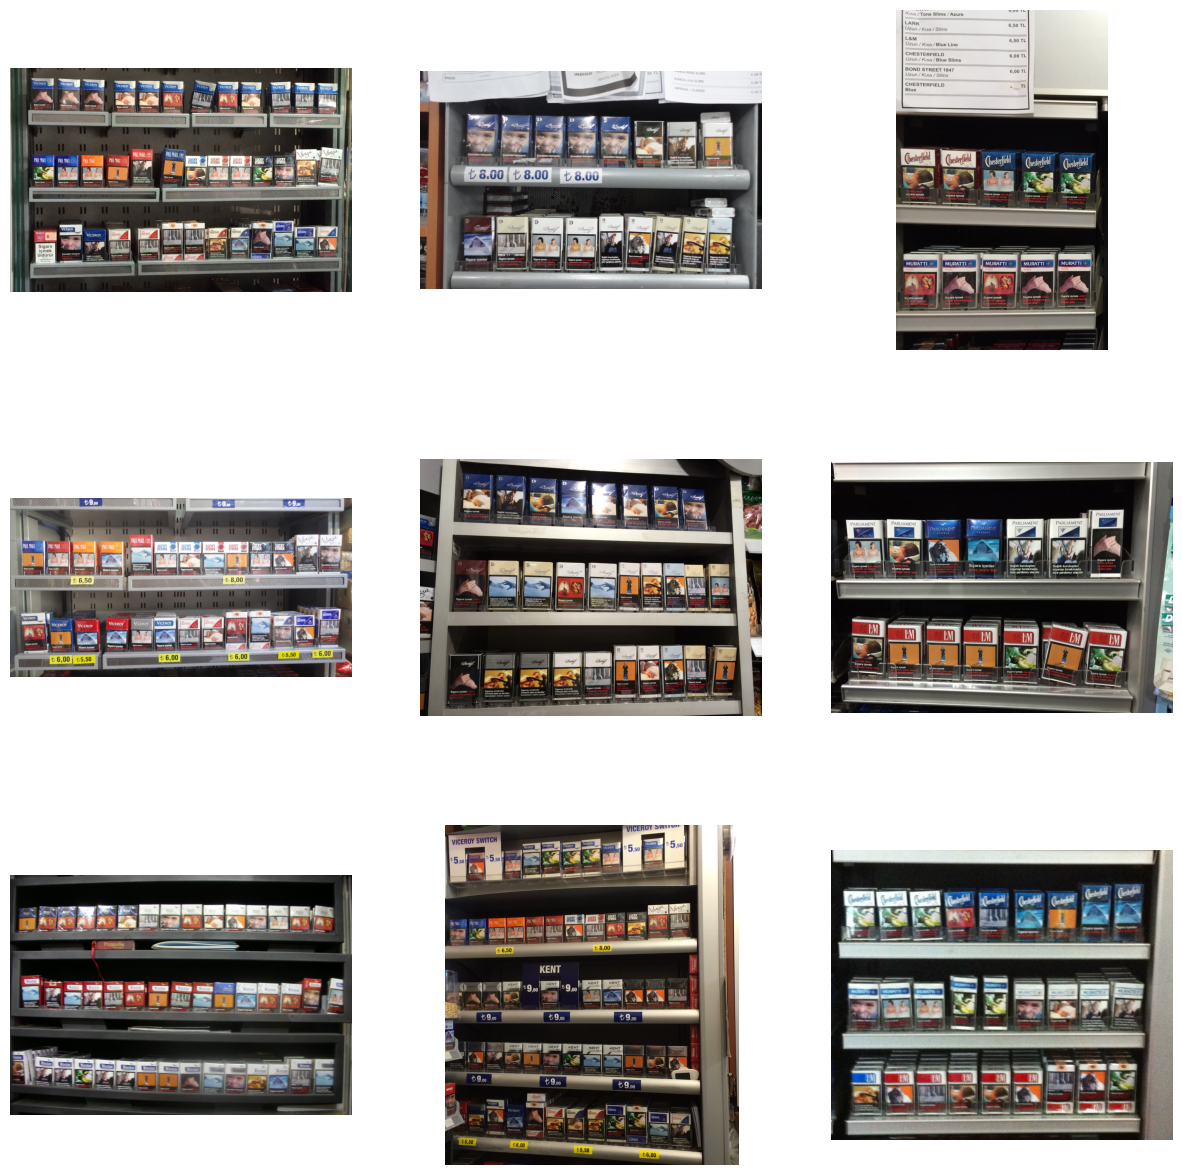

In [7]:
train_images = list(paths.list_images("dataset/train"))
plt.figure(figsize=(15, 15))
for i, image  in enumerate(train_images[:9]):
    image = plt.imread(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.axis("off")

El mapeo de estas imágenes lo tenemos dentro del archivo de [`annotations.csv`](https://github.com/gulvarol/grocerydataset/blob/master/annotations.csv)

```
<shelf image name> <n> <x_1> <y_1> <w_1> <h_1> <b_1> <x_2> <y_2> <w_2> <h_2> <b_2> ... <x_n> <y_n> <w_n> <h_n> <b_n>
    where
        <shelf image name>   := shelf image name
        <n>                  := number of product on the shelf image
        <x_i>                := x-coordinate of the i'th product image
        <y_i>                := y-coordinate of the i'th product image
        <w_i>                := width of the i'th product image
        <h_i>                := height of the i'th product image
        <b_i>                := brand of the i'th product image
```

## Visualizar anotaciones de bbox

In [9]:
cols = ["image_name", "x_i", "y_i", "w_i", "h_i", "b_i"]
master_df = pd.read_csv("https://raw.githubusercontent.com/gulvarol/grocerydataset/master/annotations.csv",
                        names=cols)
master_df.head()

,image_name,x_i,y_i,w_i,h_i,b_i
0,C1_P01_N1_S2_1.JPG,1008,1552,1260,1928,0
1,C1_P01_N1_S2_1.JPG,1028,928,1280,1304,0
2,C1_P01_N1_S2_1.JPG,24,872,268,1264,0
3,C1_P01_N1_S2_1.JPG,280,1568,532,1944,0
4,C1_P01_N1_S2_1.JPG,292,872,544,1248,0


In [10]:
# ¿Cuántas marcas únicas? (0 significa "otra" clase)
master_df["b_i"].unique()

array([ 0,  1,  4,  7,  3,  6, 10,  2,  5,  8,  9])

Visualicemos algunas imágenes con sus respectivas anotaciones. Desarrollaremos una pequeña utilidad para este propósito.

In [11]:
cols = ["image_name", "x_i", "y_i", "w_i", "h_i", "b_i"]
master_df = pd.read_csv("https://raw.githubusercontent.com/gulvarol/grocerydataset/master/annotations.csv",
                        names=cols)
master_df.head()

,image_name,x_i,y_i,w_i,h_i,b_i
0,C1_P01_N1_S2_1.JPG,1008,1552,1260,1928,0
1,C1_P01_N1_S2_1.JPG,1028,928,1280,1304,0
2,C1_P01_N1_S2_1.JPG,24,872,268,1264,0
3,C1_P01_N1_S2_1.JPG,280,1568,532,1944,0
4,C1_P01_N1_S2_1.JPG,292,872,544,1248,0


Comencemos con la primera imagen del marco de datos anterior. Su ruta absoluta está presente en `train_images`.

In [12]:
def vis_annotations(image_path: str, coordinate_list: List[List[int]],
                    color: str="blue") -> None:
    """Converts bounding box to matplotlib format, imposes it on the
    provided image and then displays the plot."""
    image = plt.imread(image_path)
    fig = plt.imshow(image)
    for i in range(len(coordinate_list)):
        bbox = coordinate_list[i]
        fig.axes.add_patch(plt.Rectangle(
            xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
            fill=False, edgecolor=color, linewidth=2))
    plt.show()

In [18]:
train_images[5]

'dataset/train/C1_P12_N4_S2_1.JPG'

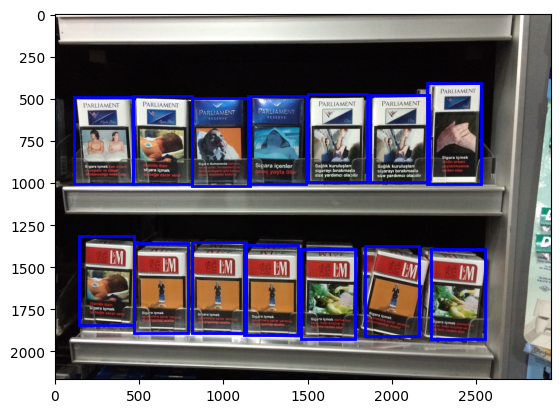

In [22]:
coordinate_columns = master_df.columns[1:-1]
coordinate_list = master_df[master_df["image_name"]=="C1_P12_N4_S2_1.JPG"][coordinate_columns]
coordinate_list = coordinate_list.values.tolist()
vis_annotations("dataset/train/C1_P12_N4_S2_1.JPG", coordinate_list)